# Data pre-processing

## Preparation

In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

Using TensorFlow backend.


In [3]:
# before use data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# get the work directory
os.chdir('/content/gdrive/My Drive/STAT-628-3')
# show the files in the wd
print('The work directory contains:')
!ls

The work directory contains:
business.json  images		models	     tip.json
data	       load_data.ipynb	review.json  user.json


In [0]:
# check ram
!cat /proc/meminfo

MemTotal:       37068376 kB
MemFree:        32912708 kB
MemAvailable:   35275748 kB
Buffers:           88468 kB
Cached:          2305896 kB
SwapCached:            0 kB
Active:          1286156 kB
Inactive:        2142880 kB
Active(anon):     767128 kB
Inactive(anon):      356 kB
Active(file):     519028 kB
Inactive(file):  2142524 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               692 kB
Writeback:             0 kB
AnonPages:       1032772 kB
Mapped:           344760 kB
Shmem:               852 kB
Slab:             358780 kB
SReclaimable:     191444 kB
SUnreclaim:       167336 kB
KernelStack:       15568 kB
PageTables:        11216 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    18534188 kB
Committed_AS:   10511008 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:     16384 kB
ShmemHugePages:  

In [0]:
# load the data from .json files
def load_json(filename):
    '''
    Load the give .json files to a data frame for STAT-628-Module-3
    '''
    res = [] # list of dicts
    with open(filename, 'r') as f:
        try:
            while True:
                line = f.readline()
                if line:
                    res.append(json.loads(line))
                    del line
                else:
                    break
        except:
            f.close()
    
    output = pd.DataFrame.from_dict(res) # list of dicts -> data frame
    del res

    return output

## Business

In [7]:
# load business file into a data frame
business = load_json('business.json')
business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."


In [8]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,38.541803,-97.594785,3.585627,33.538962,0.823040
std,4.941964,16.697725,1.018458,110.135224,0.381635
min,33.204642,-115.493471,1.000000,3.000000,0.000000
25%,33.637408,-112.274677,3.000000,4.000000,1.000000
50%,36.144815,-111.759323,3.500000,9.000000,1.000000
75%,43.602989,-79.983614,4.500000,25.000000,1.000000
max,51.299943,-72.911982,5.000000,8348.000000,1.000000


In [0]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         192609 non-null object
city            192609 non-null object
state           192609 non-null object
postal_code     192609 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [0]:
business['categories'].value_counts()[0:26]

Restaurants, Pizza                           1042
Nail Salons, Beauty & Spas                   1031
Pizza, Restaurants                            993
Beauty & Spas, Nail Salons                    947
Food, Coffee & Tea                            888
Mexican, Restaurants                          885
Coffee & Tea, Food                            865
Restaurants, Mexican                          853
Chinese, Restaurants                          840
Hair Salons, Beauty & Spas                    831
Beauty & Spas, Hair Salons                    819
Restaurants, Chinese                          789
Automotive, Auto Repair                       585
Auto Repair, Automotive                       534
Food, Grocery                                 492
Grocery, Food                                 491
Restaurants, Italian                          474
Italian, Restaurants                          446
Banks & Credit Unions, Financial Services     439
Financial Services, Banks & Credit Unions     401


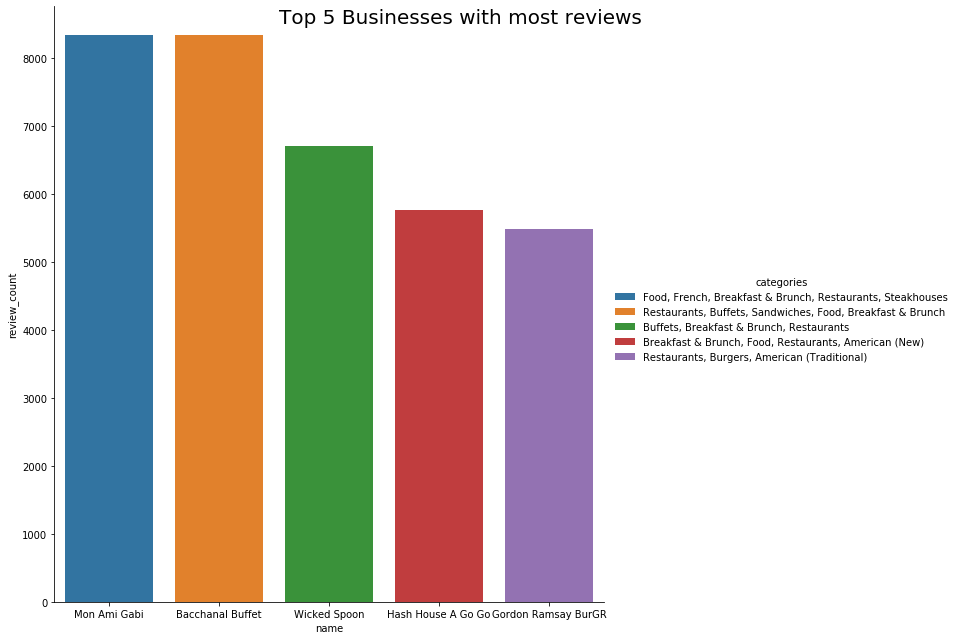

In [0]:
busi_catplot = sns.catplot(x="name", y="review_count", data = business.nlargest(5,'review_count'), kind="bar", hue = 'categories', height = 9, dodge = False);
busi_catplot.fig.suptitle('Top 5 Businesses with most reviews', fontsize=20);
plt.savefig("images/busi_catplot.jpg")

In [9]:
# we choose "Ice cream" as our theme
# use the "ice cream" part of the data frame
busi_mexi = business.loc[(business['categories'] == 'Mexican, Restaurants') | (business['categories'] == 'Restaurants, Mexican') , :]
busi_mexi.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
146,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,"3140 S Gilbert Rd, Ste 3",Chandler,AZ,85286,33.261325,-111.790815,4.0,84,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Restaurants, Mexican",None
276,c7JoAt6a3Ufkpn3TrGU23A,Santanas Mexican Food,1930 W Buckeye Rd,Phoenix,AZ,85009,33.436984,-112.101267,3.0,6,1,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...","Mexican, Restaurants",None
285,AXq8uPxqBP-c5PCrnba-4A,Mexico Lindo,971 O'Connor Drive,Toronto,ON,M4K 1T1,43.708355,-79.310127,4.5,6,1,"{'RestaurantsGoodForGroups': 'True', 'Ambience...","Mexican, Restaurants","{'Monday': '15:0-21:0', 'Tuesday': '11:0-21:0'..."


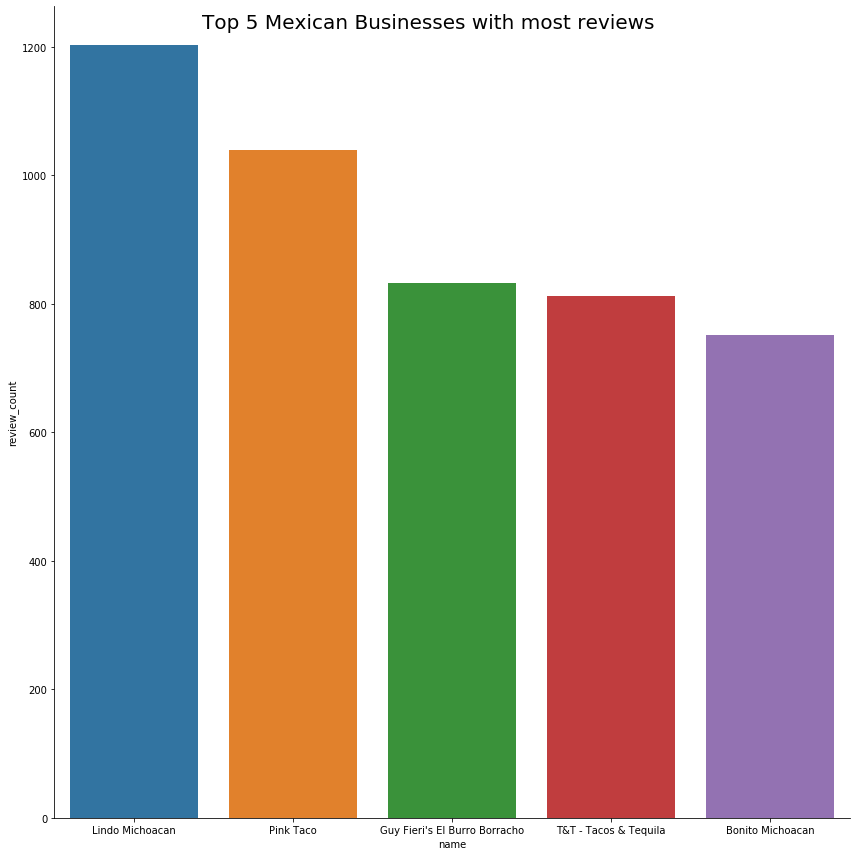

In [10]:
mexi_catplot = sns.catplot(x="name", y="review_count", data = busi_mexi.nlargest(5,'review_count'), kind="bar", height = 12, dodge = True);
mexi_catplot.fig.suptitle('Top 5 Mexican Businesses with most reviews', fontsize=20);
plt.savefig("images/mexi_catplot.jpg")

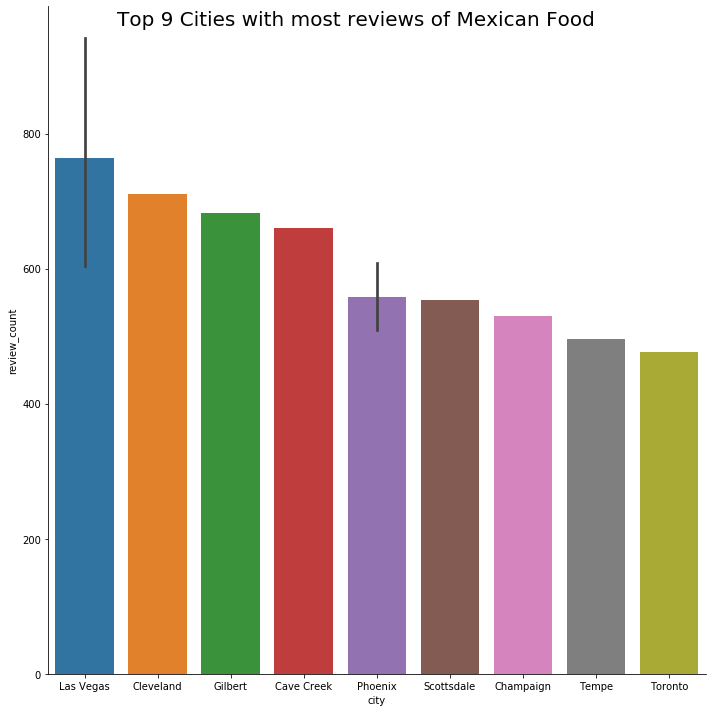

In [11]:
mexi_catplot = sns.catplot(x="city", y="review_count", data = busi_mexi.nlargest(20,'review_count'), kind="bar", height = 10, dodge = True);
mexi_catplot.fig.suptitle('Top 9 Cities with most reviews of Mexican Food', fontsize=20);
plt.savefig("images/city_catplot.jpg")

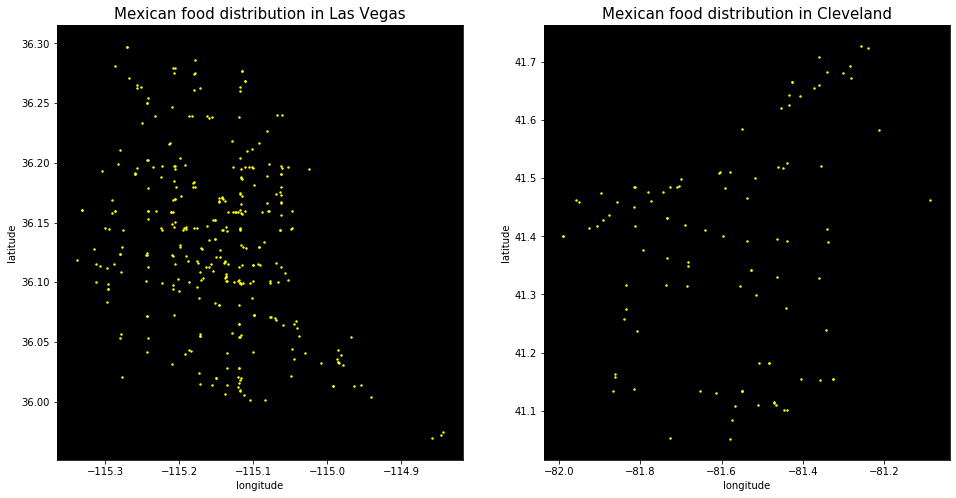

In [13]:
# get position data 
position = busi_mexi[['latitude','longitude','stars','review_count']].copy()
# get popularity
position['popularity'] = position['stars'] * position['review_count']

# the position plot
position_plot, (vegas_plot, clevel_plot) = plt.subplots(1, 2, figsize=(16, 8))

###### for vegas
# a center of vegas
lat = 36
lon = -115
# a range of Vegas
lon_min, lon_max = lon-0.5, lon+0.5
lat_min, lat_max = lat-0.5, lat+0.5
# ice cream business in vegas
vegas = position[(position["longitude"] > lon_min) & (position["longitude"] < lon_max) & (position["latitude"] > lat_min) & (position["latitude"] < lat_max)]
# scatter plot
vegas.plot(kind='scatter', x='longitude', y='latitude', color='yellow', s = 2, fontsize = 10, ax = vegas_plot, subplots = True)
vegas_plot.set_title("Mexican food distribution in Las Vegas", fontsize = 15)
vegas_plot.set_facecolor('black')

###### for clevel
# a center of clevel
lat = 41.5
lon = -81.5
# a range of clevel
lon_min, lon_max = lon-0.5, lon+0.5
lat_min, lat_max = lat-0.5, lat+0.5
# ice cream business in clevel
clevel = position[(position["longitude"] > lon_min) & (position["longitude"] < lon_max) & (position["latitude"] > lat_min) & (position["latitude"] < lat_max)]

# scatter plot
clevel.plot(kind='scatter', x='longitude', y='latitude', color='yellow', s = 2, fontsize = 10, ax = clevel_plot, subplots = True)
clevel_plot.set_title("Mexican food distribution in Cleveland", fontsize = 15)
clevel_plot.set_facecolor('black')

# save the plot
plt.savefig("images/position.jpg")

In [0]:
# free RAM
del business

## Review

In [14]:
review = load_json('review.json')
review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03


In [15]:
revi_mexi = review.loc[review["business_id"].isin(busi_mexi["business_id"]),:]
revi_mexi.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
142,kN7QMpXNT38NeeesQ6zYUQ,U6tZwpRVjUfx-fwDbMAlPA,lVfZ2AaYRYHCFenUMQna8g,5.0,0,2,0,Oooh momma!\nThe flavor is strong with this on...,2015-10-07 20:52:28
208,KLlEXggpyLEfBYOhSbqtgg,gEqc7SFZEI_Z0eLRR0ouug,fGnILhhgE393e-8X9JIB4Q,4.0,1,0,0,We lived in Mexico for several years so are al...,2018-02-23 23:15:39
218,qa0QwP9mvcN9Pml6a-5K1g,dtanlcid8_m1L49ZK1YPfw,7rpa12_EX3A-hyGtrv8o3A,4.0,1,0,2,Great food in a homely Mexican setting. The to...,2011-10-27 13:17:18


In [16]:
revi_mexi.shape

(109027, 9)

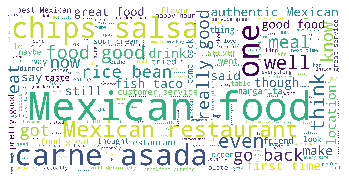

In [17]:
# wordcloud
cloud = revi_mexi.text.values
cloud = "".join(str(s) for s in cloud)
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, random_state=30, scale=10)
wordcloud.generate_from_text(cloud);
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('images/wordcloud.jpg')

In [0]:
# relationship between word and ratings
def distribution(words, review, star):
    data=[]
    stars_category=[1.0,2.0,3.0,4.0,5.0]
    for i in words:
        index=0
        stars=[]
        for j in review:
            if i in j :
                stars.append(star[index])
            index += 1
        data.append(stars)
    for k in range(len(words)):
        counts=[]
        for l in stars_category:
            counts.append(data[k].count(l))
        plt.bar(range(len(counts)), counts, color=['lightsalmon','coral','tomato','orangered','red'], tick_label=stars_category)
        plt.suptitle(words[k],fontsize=30)
        plt.xlabel("stars",fontsize=15)
        plt.ylabel("frequency",fontsize=15)
        plt.show()

In [0]:
word_list = ['carne asada', 'salsa', 'taco', 'hot', 'cold', 'kid', 'charge', 'price', 'awful', 'terrible', 'disaster']

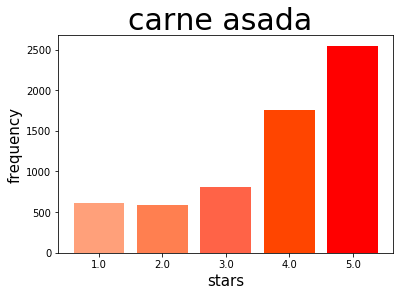

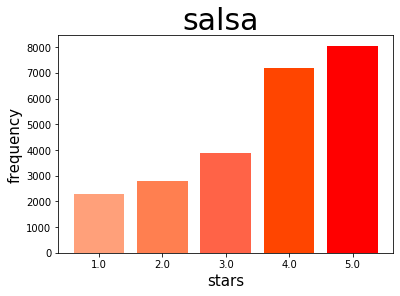

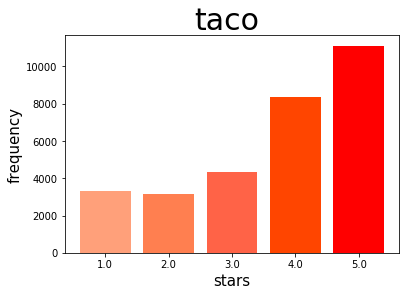

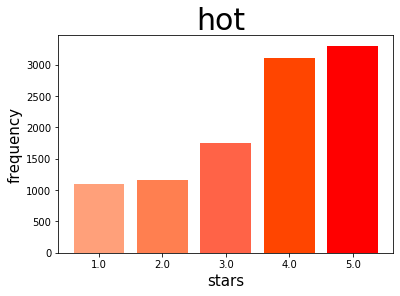

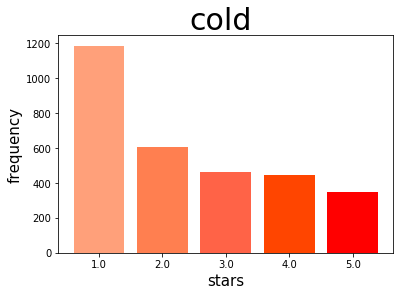

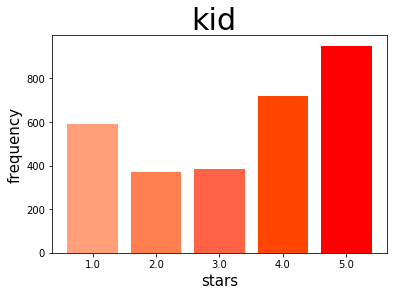

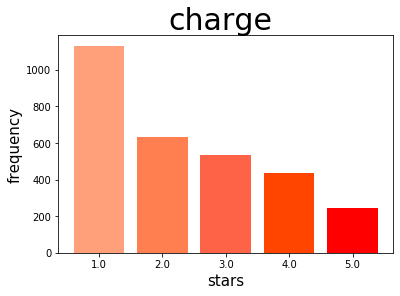

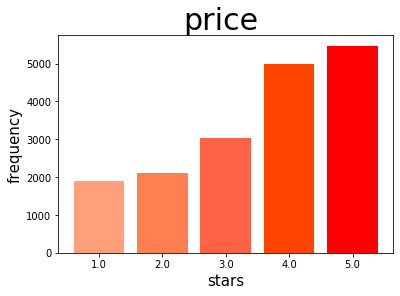

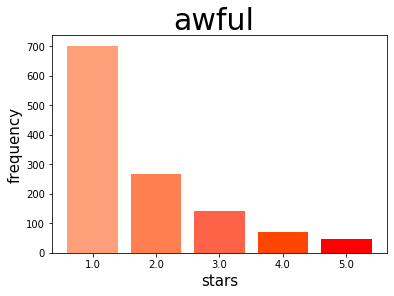

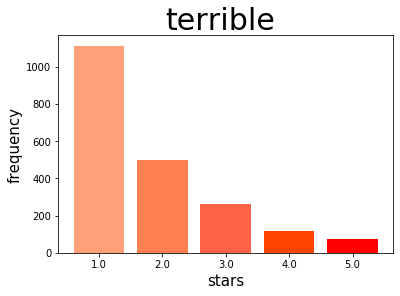

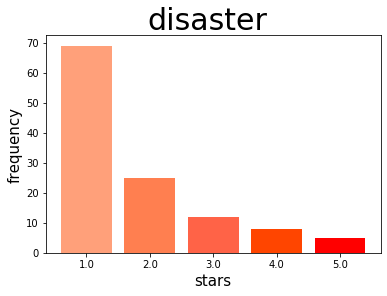

In [0]:
distribution(word_list, revi_mexi.text.values.tolist(), revi_mexi.stars.values.tolist())

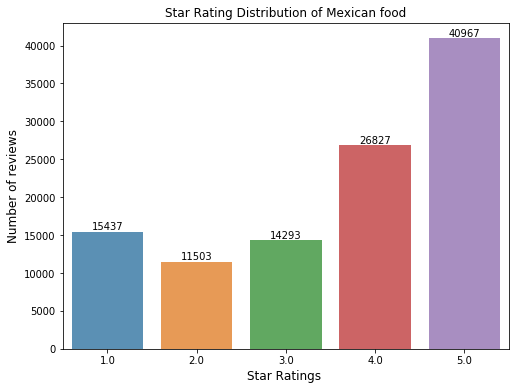

In [22]:
# stars of ice cream business
star = revi_mexi['stars'].value_counts()
star = star.sort_index()
# the barplot
plt.figure(figsize=(8,6))
star_plot = sns.barplot(star.index, star.values, alpha=0.8)
plt.title("Star Rating Distribution of Mexican food")
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)
# labels
for rect, label in zip(star_plot.patches, star.values):
    star_plot.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5, label, ha='center', va='bottom')
# save the barplot
plt.savefig("images/star_plot.jpg")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

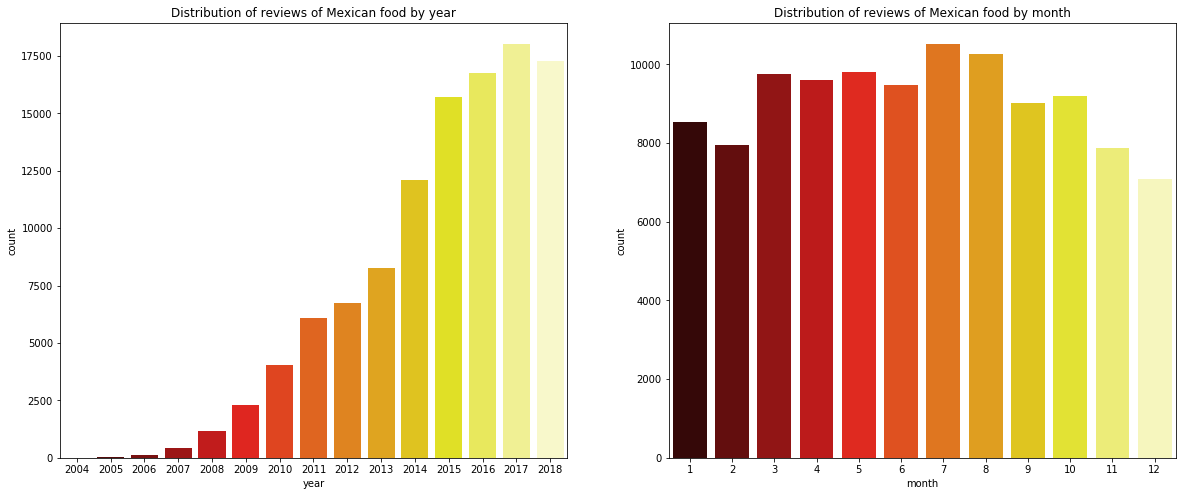

In [54]:
# modify the times
revi_mexi['date'] = pd.to_datetime(revi_mexi['date'])
revi_mexi['year'] = revi_mexi['date'].dt.year
revi_mexi['month'] = revi_mexi['date'].dt.month

f, ax = plt.subplots(1, 2, figsize = (20, 8))
ax1, ax2 = ax.flatten()

# year
cnt  = cnt  = revi_mexi.groupby('year').count().review_id.to_frame()
sns.barplot(cnt.index, cnt['review_id'], palette='hot', ax = ax1)
ax1.set_title('Distribution of reviews of Mexican food by year')
ax1.set_ylabel('count')

# month
cnt  = cnt  = revi_mexi.groupby('month').count().review_id.to_frame()
sns.barplot(cnt.index, cnt['review_id'], palette='hot', ax = ax2)
ax2.set_title('Distribution of reviews of Mexican food by month')
ax2.set_ylabel('count')

# save the plot
plt.savefig("images/time.jpg")

In [0]:
# free RAM
del review

## Merge the data frames
not used.

In [19]:
mexi = pd.merge(busi_mexi, revi_mexi, how = "outer", on = "business_id")
mexi.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,"3140 S Gilbert Rd, Ste 3",Chandler,AZ,85286,33.261325,-111.790815,4.0,84,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Restaurants, Mexican",None,2rHmbiB9EHVK62A3ZOsqqA,JiOGGJP2v6E0m2ewBSPbwQ,5.0,0,0,0,We eat here pretty much weekly. My husband was...,2013-12-28 20:59:06
1,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,"3140 S Gilbert Rd, Ste 3",Chandler,AZ,85286,33.261325,-111.790815,4.0,84,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Restaurants, Mexican",None,MRK4F-d9h7Z5qBLdcoKx-w,H5hqPI4wBE48qAWW2U6ZrA,5.0,0,0,0,Perfection! Green chile sauce in pork stew bow...,2014-04-20 04:43:40
2,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,"3140 S Gilbert Rd, Ste 3",Chandler,AZ,85286,33.261325,-111.790815,4.0,84,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Restaurants, Mexican",None,nSB22BgoRdbxQoHPhPb3gw,xyJnoDO475qiPFaSMyQzNA,4.0,0,0,0,"My wife had the chicken salad and was pleased,...",2013-05-08 06:30:58


```Star_x``` is the star of business, while ```star_y``` is the star of the review.

In [0]:
# free RAM
del busi_ice
del revi_ice

## User
We finally choose not to use data from ```user.json``` and ```tips.json```.

In [0]:
# if necessary, use the information from user.json
user = load_json('user.json')
user = user.drop(['cool', 'funny', 'review_count', 'useful','name'], axis=1)
user.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,0,2,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,0,0,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,0,0,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10


In [0]:
final = pd.merge(ice, user, on="user_id", how="left")
final.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name_x,postal_code,review_count_x,stars_x,state,cool_x,date,funny_x,review_id,stars_y,text,useful_x,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,review_count_y,useful_y,yelping_since
0,20801 N Main St,"{'BusinessParking': '{'garage': False, 'street...",9FPEg18SyYsKgbWZ0XDysQ,"Food, Ice Cream & Frozen Yogurt",Cornelius,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,35.491159,-80.858233,Carolina Cones,28031,36,4.5,NC,0,2015-07-16 13:24:01,0,f9feP-Y-o--4vvPToiW8VQ,5.0,Best ice cream at the lake. Great place to t...,1,iBC1SyHZBOO55tTsdSdfHA,3.88,0,0,0,0,0,0,0,0,0,0,0,1,,0,"S6o1lM5jMe5tNfRgR5JPiw, gVRxmRzoDNWeWKoVBwX6Dw...",1,Don,8,6,2011-11-16 22:14:34
1,20801 N Main St,"{'BusinessParking': '{'garage': False, 'street...",9FPEg18SyYsKgbWZ0XDysQ,"Food, Ice Cream & Frozen Yogurt",Cornelius,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,35.491159,-80.858233,Carolina Cones,28031,36,4.5,NC,0,2018-04-28 01:07:42,0,GIiAUcUxQu94Swa9UWJj_A,4.0,Lots of flavors!! They allow ya to try any of ...,0,FhqgZHUjzV6x9uYNs05Q5A,3.92,4,0,4,2,0,0,7,1,5,0,7,133,2018,10,"f_HEIl5aW8LX2i7H6jvMTg, 6YnVS7aorcICJ09iM9y73w...",96,Jennifer,171,236,2012-07-31 10:39:07
2,20801 N Main St,"{'BusinessParking': '{'garage': False, 'street...",9FPEg18SyYsKgbWZ0XDysQ,"Food, Ice Cream & Frozen Yogurt",Cornelius,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,35.491159,-80.858233,Carolina Cones,28031,36,4.5,NC,0,2016-07-15 13:40:05,0,JoXg3Yz4upStaYPFPZq98A,5.0,I took my wife and two kids here on a Friday n...,1,HptInOCjRLz9ddpkbaZpeQ,4.08,0,0,0,0,0,0,0,0,1,0,0,0,,0,"1fyzWwIyoGcjWEIeXwxjsA, ps0Y_WkkywSIQAzTszzGOQ",2,Jason,13,4,2016-07-01 22:43:32


In [0]:
# free RAM
del user
del ice

In [0]:
final.shape

(20227, 43)

In [0]:
final.describe()

,is_open,latitude,longitude,review_count_x,stars_x,cool_x,funny_x,stars_y,useful_x,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,fans,funny_y,review_count_y,useful_y
count,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000
mean,0.772482,38.229592,-97.542382,114.097345,3.989371,0.738864,0.541751,3.990261,1.104712,3.794739,58.119642,2.006921,58.119642,39.904237,1.295397,4.495971,26.248134,23.437831,66.711524,3.101300,21.786474,470.244871,19.491175,344.775201,185.210807,680.036041
std,0.419240,4.473430,16.730805,144.850902,0.616174,2.519779,1.879141,1.244489,2.787722,0.640243,345.963496,21.104430,345.963496,307.803158,12.845063,25.926652,135.749523,210.431459,394.679755,29.046509,122.717323,2789.411382,73.596035,2294.793103,475.280791,3353.072019
min,0.000000,33.217815,-115.334015,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,33.655684,-114.054073,24.000000,3.500000,0.000000,0.000000,3.000000,0.000000,3.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,14.000000,8.000000
50%,1.000000,36.151466,-111.788778,67.000000,4.000000,0.000000,0.000000,4.000000,0.000000,3.840000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16.000000,2.000000,12.000000,52.000000,51.000000
75%,1.000000,41.485917,-80.580601,138.000000,4.500000,1.000000,0.000000,5.000000,1.000000,4.160000,10.000000,0.000000,10.000000,5.000000,0.000000,2.000000,7.000000,2.000000,9.000000,0.000000,6.000000,118.000000,11.000000,86.000000,176.000000,288.000000
max,1.000000,51.292454,-73.457086,707.000000,5.000000,104.000000,66.000000,5.000000,108.000000,5.000000,13015.000000,2254.000000,13015.000000,9917.000000,1306.000000,1441.000000,4659.000000,11129.000000,13077.000000,2331.000000,5670.000000,82128.000000,1574.000000,86122.000000,12390.000000,89418.000000


In [0]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20227 entries, 0 to 20226
Data columns (total 43 columns):
address               20227 non-null object
attributes            19955 non-null object
business_id           20227 non-null object
categories            20227 non-null object
city                  20227 non-null object
hours                 17191 non-null object
is_open               20227 non-null int64
latitude              20227 non-null float64
longitude             20227 non-null float64
name_x                20227 non-null object
postal_code           20227 non-null object
review_count_x        20227 non-null int64
stars_x               20227 non-null float64
state                 20227 non-null object
cool_x                20227 non-null int64
date                  20227 non-null object
funny_x               20227 non-null int64
review_id             20227 non-null object
stars_y               20227 non-null float64
text                  20227 non-null object
useful_x   

In [0]:
# save the data
final.to_csv('ice_data.csv')

## The Text data (X) and stars (y)

In [0]:
text = revi_mexi.text.to_frame()
stars = revi_mexi.stars.to_frame()
final_data = pd.concat([text, stars], axis=1)

final_data.to_csv("data/final_data.csv")
final_data.head()

,text,stars
142,Oooh momma!\nThe flavor is strong with this on...,5.0
208,We lived in Mexico for several years so are al...,4.0
218,Great food in a homely Mexican setting. The to...,4.0
258,I have visited this place several times. They ...,4.0
291,Im obsessed with this place! Best dishes to tr...,5.0


In [0]:
# data shape: (n_samples, 2)
final_data.shape

(109027, 2)

In [0]:
# count of stars
final_data.stars.value_counts()

5.0    40967
4.0    26827
1.0    15437
3.0    14293
2.0    11503
Name: stars, dtype: int64

In [0]:
# check for missing values
final_data.isna().any()

text     False
stars    False
dtype: bool

## load the chosen data 
(Start here if the ```.csv``` file was generated)

In [0]:
final_data = pd.read_csv('data/final_data.csv')
text = final_data.text.values
star = final_data.stars.values

## Pre-processing
### Tokenizer

In [0]:
# hyper parameters
MAX_NUM_WORDS = 1000 # the maximum number of words to keep, based on word frequency
MAX_SEQUENCE_LENGTH=100 # max number of words in a review to use (if length of review not enough, padding with 0 in the left)

In [0]:
# lowercase and tokenization
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS, lower=True, split=" ")
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

word_index = tokenizer.word_index # the generated dictionary
print('The length of the dictionary: %s' % len(word_index))

data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
label = keras.utils.to_categorical(np.asarray(star))

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', label.shape)

The length of the dictionary: 60707
Shape of data tensor: (109027, 100)
Shape of label tensor: (109027, 6)


In [0]:
# view the data
data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1, 160,   7, 964,  17,  13,  48, 252, 199, 108,  14,  23,
       859,   2,  39, 877, 100, 602, 490, 342, 124], dtype=int32)

In [0]:
text[0]

"Oooh momma!\nThe flavor is strong with this one.\nClean, fast, friendly everytime. But not weird and sterile like Baja Fresh.\nGlad they're open again!"

In [0]:
word_index["flavor"]

160

### Word Embedding

In [0]:
# load the GloVe models
GLOVE_PATH = './models/'
EMBEDDING_DIM = 50

embeddings_index = {}
f = open(os.path.join(GLOVE_PATH, 'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Length of word embedding dictionary: %s' % len(embeddings_index))

Length of word embedding dictionary: 400000


array([ 0.21705 ,  0.46515 , -0.46757 ,  0.10082 ,  1.0135  ,  0.74845 ,
       -0.53104 , -0.26256 ,  0.16812 ,  0.13182 , -0.24909 , -0.44185 ,
       -0.21739 ,  0.51004 ,  0.13448 , -0.43141 , -0.03123 ,  0.20674 ,
       -0.78138 , -0.20148 , -0.097401,  0.16088 , -0.61836 , -0.18504 ,
       -0.12461 , -2.2526  , -0.22321 ,  0.5043  ,  0.32257 ,  0.15313 ,
        3.9636  , -0.71365 , -0.67012 ,  0.28388 ,  0.21738 ,  0.14433 ,
        0.25926 ,  0.23434 ,  0.4274  , -0.44451 ,  0.13813 ,  0.36973 ,
       -0.64289 ,  0.024142, -0.039315, -0.26037 ,  0.12017 , -0.043782,
        0.41013 ,  0.1796  ], dtype=float32)